In [1]:
import osmnx as ox
import folium
import geopandas as gpd

In [10]:
north = 41.9970
south = 32.5288
east = -114.166844
west = -124.362983


In [12]:
from shapely.geometry import box

california_bbox = box(west, south, east, north)

# 提取加州内部的 POI
tags = {
    'amenity': ['bar', 'biergarten', 'cafe', 'fast_food', 'food_court', 'ice_cream', 'pub', 'restaurant']
}  # 这里设置要提取的 POI 类型，可以根据需要进行调整
pois = ox.features_from_polygon(california_bbox, tags=tags)

# 打印结果
print(len(pois))
print(pois.head())




/Users/guanxi/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 379 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


55347
                            amenity   cuisine                 name  \
element_type osmid                                                   
node         1072454410  restaurant  regional     Foothills Eatery   
             1080051107  restaurant   seafood     Mr. Fish & Chips   
             1080868196   fast_food       NaN            Bernardos   
             1101380561  restaurant       NaN  The Cove Restaurant   
             1943761708  restaurant   mexican     Tacos El Cositas   

                                            geometry addr:housenumber  \
element_type osmid                                                      
node         1072454410  POINT (-114.41042 32.66822)              NaN   
             1080051107  POINT (-114.41043 32.66740)            11243   
             1080868196  POINT (-114.41047 32.66704)              NaN   
             1101380561  POINT (-114.45790 32.88607)              NaN   
             1943761708  POINT (-114.44534 32.66568)             

In [15]:
sustenance = pois[['amenity','name','geometry']]

In [16]:
gdf = gpd.GeoDataFrame(sustenance,crs="EPSG:4326")
gdf.set_geometry('geometry',crs={'init': 'epsg:4326'})

/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


amenity                 name  \
element_type osmid                                         
node         1072454410  restaurant     Foothills Eatery   
             1080051107  restaurant     Mr. Fish & Chips   
             1080868196   fast_food            Bernardos   
             1101380561  restaurant  The Cove Restaurant   
             1943761708  restaurant     Tacos El Cositas   
...                             ...                  ...   
way          974697407   restaurant    Good Harvest Cafe   
             974697415   restaurant        Los Compadres   
             974697428         cafe   Dutch Bros. Coffee   
             974697430   restaurant          Chart House   
             975272962    fast_food      Jack in the Box   

                                                                  geometry  
element_type osmid                                                          
node         1072454410                        POINT (-114.41042 32.66822)  
             1080051107                        POINT (-114.41043 32.66740)  
             1080868196                        POINT (-114.41047 32.66704)  
             1101380561                        POINT (-114.45790 32.88607)  
             1943761708                        POINT (-114.44534 32.66568)  
...                                                                    ...  
way          974697407   POLYGON ((-124.18292 41.75107, -124.18271 41.7...  
             974697415   POLYGON ((-124.18355 41.75170, -124.18345 41.7...  
             974697428   POLYGON ((-124.19626 41.75584, -124.19622 41.7...  
             974697430   POLYGON ((-124.18111 41.74388, -124.18090 41.7...  
             975272962   POLYGON ((-124.19599 41.75611, -124.19591 41.7...  

[55347 rows x 3 columns]

In [31]:
filtered_data = gdf[gdf.index.get_level_values('element_type') != 'node']

In [34]:
from shapely.geometry import Point

# 提取多边形的中心点
centroids = filtered_data['geometry'].centroid

# 创建新的 GeoDataFrame，存储中心点
centroid_gdf = gpd.GeoDataFrame(geometry=centroids)

# 将中心点的几何类型设置为 Point
centroid_gdf['geometry'] = centroid_gdf['geometry'].apply(lambda x: Point(x))

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/360362820.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = filtered_data['geometry'].centroid


In [39]:
filtered_data = gdf[gdf.index.get_level_values('element_type') == 'node']

In [57]:
sustenance2 = centroid_gdf

In [58]:
sustenance1 = filtered_data

In [56]:
centroid_gdf.to_file("/Users/guanxi/Desktop/Final Project/sustenance2.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/541491773.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  centroid_gdf.to_file("/Users/guanxi/Desktop/Final Project/sustenance2.shp")


In [41]:
filtered_data.to_file("/Users/guanxi/Desktop/Final Project/sustenance1.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/1479215895.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  filtered_data.to_file("/Users/guanxi/Desktop/Final Project/sustenance1.shp")


In [44]:
census_tracts = gpd.read_file('/Users/guanxi/Desktop/Final Project/tl_2023_06_tract/tl_2023_06_tract.shp')


In [45]:
import matplotlib.pyplot as plt

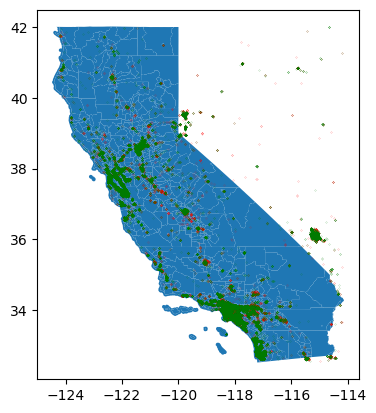

In [50]:
census_tracts = census_tracts.to_crs(epsg=4326)
# 绘制Census Tract地图
census_tracts.plot()

# 绘制centroid_gdf中的点数据
centroid_gdf.plot(color='red', ax=plt.gca(),markersize=0.01)
filtered_data.plot(color='green', ax=plt.gca(),markersize=0.01)

plt.show()

In [59]:
# 提取加州内部的 POI
tags = {
    'amenity': ['arts_centre', 'casino', 'cinema', 'community_centre', 'conference_centre', 'events_venue', 'exhibition_centre', 'gambling','music_venue','planetarium','public_bookcase','theatre','social_centre']
}  # 这里设置要提取的 POI 类型，可以根据需要进行调整
pois2 = ox.features_from_polygon(california_bbox, tags=tags)

# 打印结果
print(len(pois2))
print(pois2.head())


/Users/guanxi/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 379 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


4826
                                  amenity  \
element_type osmid                          
node         2497548897     social_centre   
             4395605151  community_centre   
             5194684020            casino   
way          183939140             cinema   
             256679645   community_centre   

                                                           brand  \
element_type osmid                                                 
node         2497548897  Benevolent and Protective Order of Elks   
             4395605151                                      NaN   
             5194684020                                      NaN   
way          183939140                          Harkins Theatres   
             256679645                                       NaN   

                        brand:wikidata  \
element_type osmid                       
node         2497548897       Q2895789   
             4395605151            NaN   
             5194684020           

In [61]:

entertainment = pois2[['amenity','name','geometry']]

In [69]:
gdf = gpd.GeoDataFrame(entertainment,crs="EPSG:4326")
gdf.set_geometry('geometry',crs={'init': 'epsg:4326'})

/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


amenity  \
element_type osmid                          
node         2497548897     social_centre   
             4395605151  community_centre   
             5194684020            casino   
way          183939140             cinema   
             256679645   community_centre   
...                                   ...   
             409186959   community_centre   
             672464747             cinema   
             672613131             cinema   
             688445528             cinema   
             740012901             cinema   

                                                           name  \
element_type osmid                                                
node         2497548897                              Elks Lodge   
             4395605151  Martin Luther King Youth Career Center   
             5194684020                         Paradise Casino   
way          183939140           Harkins Theatres Yuma Palms 14   
             256679645               North End Community Center   
...                                                         ...   
             409186959                       Trinidad Town Hall   
             672464747                                      NaN   
             672613131                    Arcata Theater Lounge   
             688445528                          Broadway Cinema   
             740012901                    Crescent City Cinemas   

                                                                  geometry  
element_type osmid                                                          
node         2497548897                        POINT (-114.64228 32.66852)  
             4395605151                        POINT (-114.63629 32.72122)  
             5194684020                        POINT (-114.61305 32.73429)  
way          183939140   POLYGON ((-114.60283 32.70471, -114.60269 32.7...  
             256679645   POLYGON ((-114.61744 32.72559, -114.61744 32.7...  
...                                                                    ...  
             409186959   POLYGON ((-124.14303 41.06027, -124.14281 41.0...  
             672464747   POLYGON ((-124.08660 40.86994, -124.08656 40.8...  
             672613131   POLYGON ((-124.08482 40.86973, -124.08476 40.8...  
             688445528   POLYGON ((-124.17482 40.79568, -124.17481 40.7...  
             740012901   POLYGON ((-124.19248 41.75561, -124.19227 41.7...  

[4826 rows x 3 columns]

In [70]:
filtered_data = gdf[gdf.index.get_level_values('element_type') != 'node']

In [82]:
centroids = filtered_data['geometry'].centroid

# 创建新的 GeoDataFrame，存储中心点
entertainment2 = gpd.GeoDataFrame(geometry=centroids)

# 将中心点的几何类型设置为 Point
entertainment2['geometry'] = entertainment2['geometry'].apply(lambda x: Point(x))

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/3742206185.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = filtered_data['geometry'].centroid


In [84]:
entertainment1 = gdf[gdf.index.get_level_values('element_type') == 'node']

In [86]:
entertainment1.to_file("/Users/guanxi/Desktop/Final Project/entertainment1.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/2335473895.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  entertainment1.to_file("/Users/guanxi/Desktop/Final Project/entertainment1.shp")


In [87]:
entertainment2.to_file("/Users/guanxi/Desktop/Final Project/entertainment2.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/4056834015.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  entertainment2.to_file("/Users/guanxi/Desktop/Final Project/entertainment2.shp")


In [88]:
tags = {
    'amenity': ['baby_hatch', 'clinic', 'dentist', 'doctors', 'hospital', 'nursing_home', 'pharmacy', 'social_facility','veterinary']
}  # 这里设置要提取的 POI 类型，可以根据需要进行调整
pois3 = ox.features_from_polygon(california_bbox, tags=tags)

# 打印结果
print(len(pois3))
print(pois3.head())

/Users/guanxi/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 379 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


9969
                        addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         359260360       Yuma             2400         85364         AZ   
             2499120899      Yuma             2491         85364         AZ   
             4121312052       NaN              NaN           NaN        NaN   
             4520241243       NaN              NaN           NaN        NaN   
             4693022572       NaN              NaN           NaN        NaN   

                              addr:street          amenity beds  ele  \
element_type osmid                                                     
node         359260360     South Avenue A         hospital  406   59   
             2499120899  West 24th Street         pharmacy  NaN  NaN   
             4121312052               NaN  social_facility  NaN  NaN   
             4520241243               NaN         pharmacy  NaN  NaN   
         

In [89]:
health = pois3[['amenity','name','geometry']]

In [115]:
gdf = gpd.GeoDataFrame(health,crs="EPSG:4326")
gdf.set_geometry('geometry',crs={'init': 'epsg:4326'})

/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


amenity                           name  \
element_type osmid                                                        
node         359260360          hospital   Yuma Regional Medical Center   
             2499120899         pharmacy                      Walgreens   
             4121312052  social_facility           Yuma Assisted Living   
             4520241243         pharmacy                   CVS Pharmacy   
             4693022572         hospital   Yuma Rehabilitation Hospital   
...                                  ...                            ...   
             7388665101         pharmacy                        Safeway   
             9502948633         pharmacy                   CVS Pharmacy   
             9661345164         pharmacy                      Walgreens   
way          492694613          hospital          Sutter Coast Hospital   
             1202472618  social_facility  Crescent City Skilled Nursing   

                                                                  geometry  
element_type osmid                                                          
node         359260360                         POINT (-114.63510 32.68266)  
             2499120899                        POINT (-114.64968 32.68308)  
             4121312052                        POINT (-114.62560 32.67796)  
             4520241243                        POINT (-114.60622 32.70509)  
             4693022572                        POINT (-114.63002 32.68335)  
...                                                                    ...  
             7388665101                        POINT (-124.19340 41.75619)  
             9502948633                        POINT (-124.19617 41.76234)  
             9661345164                        POINT (-124.19661 41.75724)  
way          492694613   POLYGON ((-124.19510 41.77280, -124.19384 41.7...  
             1202472618  POLYGON ((-124.20142 41.76806, -124.20142 41.7...  

[9969 rows x 3 columns]

In [116]:
filtered_data = gdf[gdf.index.get_level_values('element_type') != 'node']

In [117]:
centroids = filtered_data['geometry'].centroid

# 创建新的 GeoDataFrame，存储中心点
health2 = gpd.GeoDataFrame(geometry=centroids)

# 将中心点的几何类型设置为 Point
health2['geometry'] =health2['geometry'].apply(lambda x: Point(x))

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/4211570795.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = filtered_data['geometry'].centroid


In [118]:
health1 = gdf[gdf.index.get_level_values('element_type') == 'node']

In [119]:
health1

amenity                          name  \
element_type osmid                                                        
node         359260360           hospital  Yuma Regional Medical Center   
             2499120899          pharmacy                     Walgreens   
             4121312052   social_facility          Yuma Assisted Living   
             4520241243          pharmacy                  CVS Pharmacy   
             4693022572          hospital  Yuma Rehabilitation Hospital   
...                                   ...                           ...   
             11365469903  social_facility                           NaN   
             11572027328         pharmacy    Redwood Community Pharmacy   
             7388665101          pharmacy                       Safeway   
             9502948633          pharmacy                  CVS Pharmacy   
             9661345164          pharmacy                     Walgreens   

                                             geometry  
element_type osmid                                     
node         359260360    POINT (-114.63510 32.68266)  
             2499120899   POINT (-114.64968 32.68308)  
             4121312052   POINT (-114.62560 32.67796)  
             4520241243   POINT (-114.60622 32.70509)  
             4693022572   POINT (-114.63002 32.68335)  
...                                               ...  
             11365469903  POINT (-124.08969 40.88362)  
             11572027328  POINT (-124.10129 40.94387)  
             7388665101   POINT (-124.19340 41.75619)  
             9502948633   POINT (-124.19617 41.76234)  
             9661345164   POINT (-124.19661 41.75724)  

[6220 rows x 3 columns]

In [120]:
health1.to_file("/Users/guanxi/Desktop/Final Project/health1.shp")
health2.to_file("/Users/guanxi/Desktop/Final Project/health2.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/525291300.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  health1.to_file("/Users/guanxi/Desktop/Final Project/health1.shp")
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/525291300.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  health2.to_file("/Users/guanxi/Desktop/Final Project/health2.shp")


In [100]:
tags = {
    'amenity': ['atm', 'bank']
}  # 这里设置要提取的 POI 类型，可以根据需要进行调整
pois4 = ox.features_from_polygon(california_bbox, tags=tags)

# 打印结果
print(len(pois4))
print(pois4.head())

/Users/guanxi/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 379 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


6416
                              addr:street amenity        brand brand:wikidata  \
element_type osmid                                                              
node         4121848900  West 16th Street    bank        Chase        Q524629   
             4693005242               NaN    bank          NaN            NaN   
             4693005260               NaN    bank          NaN            NaN   
             4700531765               NaN    bank  Wells Fargo        Q744149   
             4701837060               NaN    bank        Chase        Q524629   

                                name                     geometry  \
element_type osmid                                                  
node         4121848900        Chase  POINT (-114.62181 32.69939)   
             4693005242          NaN  POINT (-114.61960 32.69810)   
             4693005260          NaN  POINT (-114.62138 32.69533)   
             4700531765  Wells Fargo  POINT (-114.49180 32.66975)   
             

In [101]:
financial = pois4[['amenity','name','geometry']]

In [103]:
gdf = gpd.GeoDataFrame(financial,crs="EPSG:4326")
gdf.set_geometry('geometry',crs={'init': 'epsg:4326'})

/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


amenity                        name  \
element_type osmid                                            
node         4121848900    bank                       Chase   
             4693005242    bank                         NaN   
             4693005260    bank                         NaN   
             4700531765    bank                 Wells Fargo   
             4701837060    bank                       Chase   
...                         ...                         ...   
way          855652686     bank                   U.S. Bank   
             868178999     bank  Coast Central Credit Union   
             873348062     bank           North Valley Bank   
             1225615293    bank  Coast Central Credit Union   
             1225613468    bank  Coast Central Credit Union   

                                                                  geometry  
element_type osmid                                                          
node         4121848900                        POINT (-114.62181 32.69939)  
             4693005242                        POINT (-114.61960 32.69810)  
             4693005260                        POINT (-114.62138 32.69533)  
             4700531765                        POINT (-114.49180 32.66975)  
             4701837060                        POINT (-114.44127 32.66927)  
...                                                                    ...  
way          855652686   POLYGON ((-124.16366 40.78140, -124.16366 40.7...  
             868178999   POLYGON ((-124.13982 40.78351, -124.13995 40.7...  
             873348062   POLYGON ((-124.17995 40.78090, -124.18006 40.7...  
             1225615293  POLYGON ((-124.10139 40.94142, -124.10189 40.9...  
             1225613468  POLYGON ((-124.19703 41.75652, -124.19704 41.7...  

[6416 rows x 3 columns]

In [104]:
filtered_data = gdf[gdf.index.get_level_values('element_type') != 'node']

In [108]:
centroids = filtered_data['geometry'].centroid

# 创建新的 GeoDataFrame，存储中心点
financial2 = gpd.GeoDataFrame(geometry=centroids)

# 将中心点的几何类型设置为 Point
financial2['geometry'] = financial2['geometry'].apply(lambda x: Point(x))

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/1448163491.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = filtered_data['geometry'].centroid


In [110]:
financial1 = gdf[gdf.index.get_level_values('element_type') == 'node']

In [111]:
financial1

amenity                        name  \
element_type osmid                                             
node         4121848900     bank                       Chase   
             4693005242     bank                         NaN   
             4693005260     bank                         NaN   
             4700531765     bank                 Wells Fargo   
             4701837060     bank                       Chase   
...                          ...                         ...   
             4649979447     bank  Coast Central Credit Union   
             6300528858      atm                       Chase   
             7895856991     bank  Coast Central Credit Union   
             8123196863      atm                         NaN   
             11365899049     atm                         NaN   

                                             geometry  
element_type osmid                                     
node         4121848900   POINT (-114.62181 32.69939)  
             4693005242   POINT (-114.61960 32.69810)  
             4693005260   POINT (-114.62138 32.69533)  
             4700531765   POINT (-114.49180 32.66975)  
             4701837060   POINT (-114.44127 32.66927)  
...                                               ...  
             4649979447   POINT (-124.08524 40.86677)  
             6300528858   POINT (-124.08719 40.86767)  
             7895856991   POINT (-124.08211 40.90461)  
             8123196863   POINT (-124.10131 40.95446)  
             11365899049  POINT (-124.08522 40.86674)  

[4107 rows x 3 columns]

In [112]:
financial1.to_file("/Users/guanxi/Desktop/Final Project/financial1.shp")
financial2.to_file("/Users/guanxi/Desktop/Final Project/financial2.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/1454783735.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  financial1.to_file("/Users/guanxi/Desktop/Final Project/financial1.shp")
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/1454783735.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  financial2.to_file("/Users/guanxi/Desktop/Final Project/financial2.shp")


amenity	college	node area	Campus or buildings of an institute of Further Education (aka continuing education)		
Cambridge Regional College main entrance.jpg
amenity	dancing_school	node area	A dancing school or dance studio		
Dancing lesson 16507650.jpg
amenity	driving_school	node area	Driving School which offers motor vehicle driving lessons	
Shop-other-16.svg
Fahrschulauto VW Austria St Johann.JPG
amenity	first_aid_school	node area	A place where people can go for first aid courses.		
amenity	kindergarten	node area	For children too young for a regular school (also known as preschool, playschool or nursery school), in some countries including afternoon supervision of primary school children.		
Story Time.jpg
amenity	language_school	node area	Language School: an educational institution where one studies a foreign language.		
Sede de Berlitz al norte de Bogotá.jpeg
amenity	library	node area	A public library (municipal, university, …) to borrow books from.	
Library.14.svg
Guantanamo captives' library a.jpg
amenity	surf_school	node area	A surf school is an establishment that teaches surfing.		
Surfing School at Chapel Porth (2784337863).jpg
amenity	toy_library	node area	A place to borrow games and toys, or play with them on site.		
Toy Library storage.jpg
amenity	research_institute	node area	An establishment endowed for doing research.		
Aerial View of Glenn Research Center at Lewis Field - GPN-2000-002008.jpg
amenity	training	node area	Public place where you can get training.		
Sede de Berlitz al norte de Bogotá.jpeg
amenity	music_school	node area	A music school, an educational institution specialized in the study, training, and research of music.		
Music school from Rabnita (1980). (9196267787).jpg
amenity	school	node area	School and grounds - primary, middle and seconday schools		
Williamstown school.jpg
amenity	traffic_park	node area	Juvenile traffic schools		
Lasten ajoharjoittelu rata Nordenskiöldinkatu - panoramio.jpg
amenity	university	node area	An university campus: an institute of higher education		
Brock University campus.JPG

In [113]:
tags = {
    'amenity': ['library', 'kindergarten','school']
}  # 这里设置要提取的 POI 类型，可以根据需要进行调整
pois5 = ox.features_from_polygon(california_bbox, tags=tags)

# 打印结果
print(len(pois5))
print(pois4.head())

/Users/guanxi/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 379 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


18307
                              addr:street amenity        brand brand:wikidata  \
element_type osmid                                                              
node         4121848900  West 16th Street    bank        Chase        Q524629   
             4693005242               NaN    bank          NaN            NaN   
             4693005260               NaN    bank          NaN            NaN   
             4700531765               NaN    bank  Wells Fargo        Q744149   
             4701837060               NaN    bank        Chase        Q524629   

                                name                     geometry  \
element_type osmid                                                  
node         4121848900        Chase  POINT (-114.62181 32.69939)   
             4693005242          NaN  POINT (-114.61960 32.69810)   
             4693005260          NaN  POINT (-114.62138 32.69533)   
             4700531765  Wells Fargo  POINT (-114.49180 32.66975)   
            

In [121]:
edu = pois5[['amenity','name','geometry']]

In [122]:
gdf = gpd.GeoDataFrame(edu,crs="EPSG:4326")
gdf.set_geometry('geometry',crs={'init': 'epsg:4326'})

/Users/guanxi/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


amenity                            name  \
element_type osmid                                                 
node         358792144    school              San Pasqual School   
             358792149    school       San Pasqual Valley School   
             358792151    school       San Pasqual Valley School   
             359242098    school         Arizona Western College   
             359243870    school                   Carver School   
...                          ...                             ...   
             10314036599  school             Mary Peacock School   
way          107523538    school  Crescent Elk Elementary School   
             170138275    school  Joe Hamilton Elementary School   
             404668546    school  Bess Maxwell Elementary School   
             1128125344   school             Mary Peacock School   

                                                                   geometry  
element_type osmid                                                           
node         358792144                          POINT (-114.59815 32.74831)  
             358792149                          POINT (-114.59809 32.75079)  
             358792151                          POINT (-114.59829 32.75199)  
             359242098                          POINT (-114.49655 32.68884)  
             359243870                          POINT (-114.63583 32.71774)  
...                                                                     ...  
             10314036599                        POINT (-124.21147 41.77690)  
way          107523538    POLYGON ((-124.20424 41.75580, -124.20438 41.7...  
             170138275    POLYGON ((-124.20618 41.75615, -124.20635 41.7...  
             404668546    POLYGON ((-124.21128 41.76783, -124.20934 41.7...  
             1128125344   POLYGON ((-124.21302 41.77813, -124.21312 41.7...  

[18307 rows x 3 columns]

In [123]:
filtered_data = gdf[gdf.index.get_level_values('element_type') != 'node']

In [124]:
centroids = filtered_data['geometry'].centroid

# 创建新的 GeoDataFrame，存储中心点
edu2 = gpd.GeoDataFrame(geometry=centroids)

# 将中心点的几何类型设置为 Point
edu2['geometry'] = financial2['geometry'].apply(lambda x: Point(x))

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/1064209970.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = filtered_data['geometry'].centroid


In [125]:
edu1 = gdf[gdf.index.get_level_values('element_type') == 'node']

In [128]:
edu1.to_file("/Users/guanxi/Desktop/Final Project/edu1.shp")
edu2.to_file("/Users/guanxi/Desktop/Final Project/edu2.shp")

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/792183535.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edu1.to_file("/Users/guanxi/Desktop/Final Project/edu1.shp")
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_16033/792183535.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edu2.to_file("/Users/guanxi/Desktop/Final Project/edu2.shp")
